In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import pyplot
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier  # For classification
from sklearn.ensemble import RandomForestRegressor  # For regression
from sklearn.metrics import accuracy_score 
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
import xgboost as xgb
from xgboost import XGBClassifier

In [195]:
df = pd.read_csv("df_clean_top10.csv", delimiter = ",")

# Prepare data for Model

In [196]:
#define features and label. Song characteristics is the numerical features
features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Valence', 'Previous Popularity', "Number of Artists", 'Number Songs Previous', 'Previous Top Rank Avg']
song_characteristics = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness','Valence']
label = ['Top 10']

In [197]:
X = df[features]
y = df[label]

# # Use SMOTE to oversample the minority class in the training set
# smote = SMOTE(sampling_strategy=1, random_state=42)
# X,y = smote.fit_resample(X,y)

X = X.values
y = y.values.reshape(-1)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=42, stratify=y_train)



# Use SMOTE to oversample the minority class in the training set
smote = SMOTE(sampling_strategy=1, random_state=42)
X_train,y_train = smote.fit_resample(X_train,y_train)


# Use SMOTE to oversample the minority class in the training set
smote = SMOTE(sampling_strategy=1, random_state=42)
X_test,y_test = smote.fit_resample(X_test,y_test)


# Use SMOTE to oversample the minority class in the training set
smote = SMOTE(sampling_strategy=1, random_state=42)
X_train_val,y_train_val = smote.fit_resample(X_train_val,y_train_val)

# Use SMOTE to oversample the minority class in the training set
smote = SMOTE(sampling_strategy=1, random_state=42)
X_val,y_val = smote.fit_resample(X_val,y_val)


In [198]:
from sklearn.metrics import roc_curve, roc_auc_score
#function to make the AUC_ROC graph for all models created on the validation set

roc = []

def makeGraph(y_val, X_val, models, model_names):
    plt.figure(figsize=(8, 8))

    for model, name in zip(models, model_names):
        y_true = y_val
        y_probas = model.predict_proba(X_val)[:, 1]

        roc_auc = roc_auc_score(y_true, y_probas)
        print(f'{name} ROC AUC:', roc_auc)
        roc.append(roc_auc)

        fpr, tpr, _ = roc_curve(y_true, y_probas)

        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right') 
    plt.show()

In [199]:
#list to keep track of models and model_names
models = []
model_names = []

# Different models with no parameter adjustment

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


# Create a Gaussian Naive Bayes model
gnb = GaussianNB()

# Fit the model to your training data
gnb.fit(X_train_val, y_train_val)

# Make predictions on the val data
y_pred = gnb.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)
r = roc_auc_score(y_val, y_pred)
y_pred = gnb.predict(X_val)
f1 = f1_score(y_val, y_pred)

models.append(gnb)
model_names.append("Gaussian NB")

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("ROC_AUC_SCORE: " + str(r))
print("F1: " + str(f1))

print("Classification Report:\n", report)

Accuracy: 0.7943067033976124
ROC_AUC_SCORE: 0.7943067033976124
F1: 0.810008481764207
Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.71      0.78      1089
        True       0.75      0.88      0.81      1089

    accuracy                           0.79      2178
   macro avg       0.80      0.79      0.79      2178
weighted avg       0.80      0.79      0.79      2178



In [201]:
#Create an Extreme Gradient Boosting Classifier
xgbClass = XGBClassifier(enable_categorial=True)

# Fit the model to your training data
xgbClass.fit(X_train_val, y_train_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)
r = roc_auc_score(y_val, y_pred)
y_pred = model.predict(X_val)
f1 = f1_score(y_val, y_pred)

# Make predictions on the val data
y_pred = xgbClass.predict(X_val)

models.append(xgbClass)
model_names.append("XGB Classifier")

print("Accuracy:", accuracy)
print("ROC_AUC_SCORE: " + str(r))
print("F1: " + str(f1))

print("Classification Report:\n", report)


[00:24:14] WARNING: /croot/xgboost-split_1675457761144/work/src/learner.cc:767: 
Parameters: { "enable_categorial" } are not used.

Accuracy: 0.7943067033976124
ROC_AUC_SCORE: 0.7943067033976124
F1: 0.9080145719489982
Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.71      0.78      1089
        True       0.75      0.88      0.81      1089

    accuracy                           0.79      2178
   macro avg       0.80      0.79      0.79      2178
weighted avg       0.80      0.79      0.79      2178



In [202]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score


# Create a Logistic Regression model
lr = LogisticRegression(max_iter=1000)

# Fit the model to your training data
lr.fit(X_train_val, y_train_val)

# Make predictions on the val data
y_pred = lr.predict(X_val)
y_probas = lr.predict_proba(X_val)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_probas)
report = classification_report(y_val, y_pred)
confusion = confusion_matrix(y_val, y_pred)

print("Accuracy:", accuracy)
print("ROC_AUC_SCORE: " + str(r))
print("F1: " + str(f1))

print("Classification Report:\n", report)

models.append(lr)
model_names.append("Logistic Regression")

Accuracy: 0.8168044077134986
ROC_AUC_SCORE: 0.7943067033976124
F1: 0.8249232119350592
Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.77      0.81      1089
        True       0.79      0.86      0.82      1089

    accuracy                           0.82      2178
   macro avg       0.82      0.82      0.82      2178
weighted avg       0.82      0.82      0.82      2178



In [203]:
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score


# Create a SVM model
svc = SVC(kernel='linear', probability=True)

# Fit the model to your training data
svc.fit(X_train_val, y_train_val)

# Make predictions on the val data
y_pred = svc.predict(X_val)
y_probas = svc.predict_proba(X_val)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_probas)
report = classification_report(y_val, y_pred)
confusion = confusion_matrix(y_val, y_pred)

print("Accuracy:", accuracy)
print("ROC_AUC_SCORE: " + str(r))
print("F1: " + str(f1))

print("Classification Report:\n", report)

models.append(svc)
model_names.append("SVM")


Accuracy: 0.8213957759412305
ROC_AUC_SCORE: 0.7943067033976124
F1: 0.8302051505892624
Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.77      0.81      1089
        True       0.79      0.87      0.83      1089

    accuracy                           0.82      2178
   macro avg       0.82      0.82      0.82      2178
weighted avg       0.82      0.82      0.82      2178



In [204]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

# Create a KNearestNeighbors model
knn_clf = KNeighborsClassifier()

# Fit the model to your training data
knn_clf.fit(X_train_val, y_train_val)

# Make predictions on the val data
y_pred = knn_clf.predict(X_val)
y_probas = knn_clf.predict_proba(X_val)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_probas)
report = classification_report(y_val, y_pred)
confusion = confusion_matrix(y_val, y_pred)

print("Accuracy:", accuracy)
print("ROC_AUC_SCORE: " + str(r))
print("F1: " + str(f1))

print("Classification Report:\n", report)

models.append(knn_clf)
model_names.append("KNN")


Accuracy: 0.8076216712580349
ROC_AUC_SCORE: 0.7943067033976124
F1: 0.7988478156505041
Classification Report:
               precision    recall  f1-score   support

       False       0.78      0.85      0.82      1089
        True       0.84      0.76      0.80      1089

    accuracy                           0.81      2178
   macro avg       0.81      0.81      0.81      2178
weighted avg       0.81      0.81      0.81      2178



In [205]:
#create a random forest classifier
rf = RandomForestClassifier(random_state=42)

# Fit the model to your training data
rf.fit(X_train_val, y_train_val)

# Make predictions on the val data
y_pred = rf.predict(X_val)
y_probas = rf.predict_proba(X_val)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_probas)
report = classification_report(y_val, y_pred)
confusion = confusion_matrix(y_val, y_pred)

print("Accuracy:", accuracy)
print("ROC_AUC_SCORE: " + str(r))
print("F1: " + str(f1))

print("Classification Report:\n", report)

models.append(model)
model_names.append("RF")

Accuracy: 0.8806244260789715
ROC_AUC_SCORE: 0.7943067033976124
F1: 0.8711595639246779
Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.95      0.89      1089
        True       0.95      0.81      0.87      1089

    accuracy                           0.88      2178
   macro avg       0.89      0.88      0.88      2178
weighted avg       0.89      0.88      0.88      2178



In [206]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, classification_report


# Create a GradientBoostingClassifier model
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model to your training data
gb.fit(X_train_val, y_train_val)

# Make predictions on the val data
y_pred = gb.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)
y_pred = gb.predict(X_val)
f1 = f1_score(y_val, y_pred)

models.append(gb)
model_names.append("Gradient Boosting")

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("ROC_AUC_SCORE: " + str(r))
print("F1: " + str(f1))

print("Classification Report:\n", report)

Accuracy: 0.9072543617998163
ROC_AUC_SCORE: 0.7943067033976124
F1: 0.9085144927536232
Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.89      0.91      1089
        True       0.90      0.92      0.91      1089

    accuracy                           0.91      2178
   macro avg       0.91      0.91      0.91      2178
weighted avg       0.91      0.91      0.91      2178



Gaussian NB ROC AUC: 0.8509529724155319
XGB Classifier ROC AUC: 0.9674919324305751
Logistic Regression ROC AUC: 0.9049599425256826
SVM ROC AUC: 0.9058002177210791
KNN ROC AUC: 0.8571506871031038
RF ROC AUC: 0.9695030276047056
Gradient Boosting ROC AUC: 0.9681614542621304


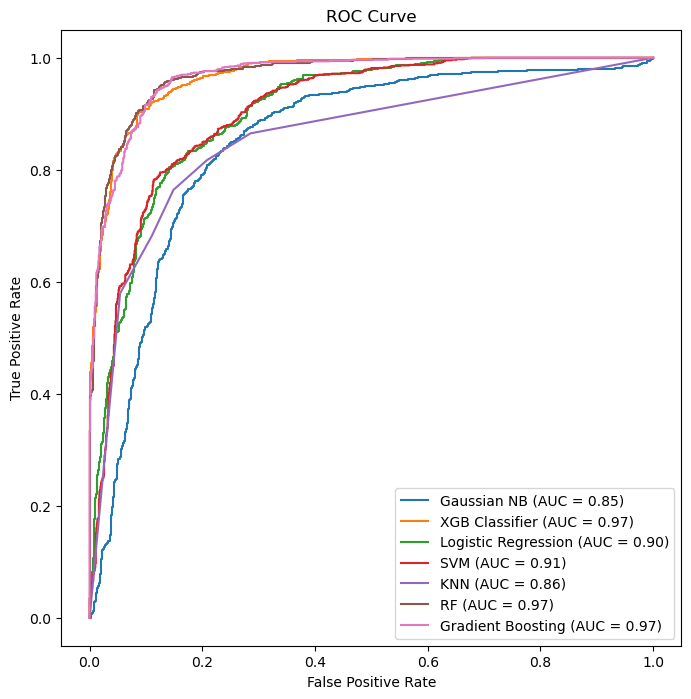

In [207]:
#use makeGraph function to display auc_roc scores and ROC curve
makeGraph(y_val, X_val, models, model_names)

## Param Tuning XGB Classifier and testing on Test Set

In [208]:
# Define the hyperparameter values to search over
n_estimators_values = [100, 200, 300]
learning_rate = [0.01, 0.1, 0.2]
max_depth_values = [None, 5, 10]
subsample = [0.8, 0.9, 1.0]
colsample_bytree = [0.8, 0.9, 1.0]

# Initialize variables for best hyperparameters and best accuracy
best_n_estimators = None
best_max_depth = None
best_f1 = 0
best_sub = 0
best_colsample = 0
best_learning = 0

# Iterate over each combination of hyperparameters
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        for sub in subsample:
            for colsample in colsample_bytree:
                for learning in learning_rate:
                # Create a Random Forest classifier model with current hyperparameters
                    xgbClass = XGBClassifier( 
                        subsample=sub,
                        colsample_bytree=colsample,
                        n_estimators = n_estimators,
                        learning_rate = learning,
                        objective='binary:logistic',  
                        eval_metric='logloss',
                        random_state = 42
                    )

                    # Fit the model to your training data
                    xgbClass.fit(X_train_val, y_train_val)

                    # Make predictions on the val data
                    y_pred = xgbClass.predict(X_val)
                    f1 = f1_score(y_val, y_pred)
                    # Check if the current accuracy is better than the previous best accuracy
                    if f1 > best_f1:
                        # Update the best hyperparameters and best accuracy
                        best_n_estimators = n_estimators
                        best_max_depth = max_depth
                        best_accuracy = accuracy
                        best_learning = learning
                        best_colsample = colsample
                        best_sub = sub
                        best_f1 = f1

# Print the best hyperparameters and best F1 score
print("Best Hyperparameters:")
print("n_estimators:", best_n_estimators)
print("max_depth:", best_max_depth)
print("Best F1:", best_f1)
print("Best Learning:", best_learning)
print("Best Colsample:", best_colsample)
print("Best Sub:", best_sub)


Best Hyperparameters:
n_estimators: 200
max_depth: None
Best F1: 0.9190880643719266
Best Learning: 0.01
Best Colsample: 0.8
Best Sub: 0.9


In [209]:
#xbg with parameter tuning
xgbClass_tuned = XGBClassifier( 
                        subsample=0.9,
                        colsample_bytree=0.8,
                        n_estimators = 200,
                        learning_rate = 0.01,
                        max_depth = None,
                        objective='binary:logistic',  
                        eval_metric='logloss' 
                    )

                    # Fit the model to your training data
xgbClass_tuned.fit(X_train_val, y_train_val)

# Make predictions on the val data
y_pred = xgbClass_tuned.predict(X_val)
f1 = f1_score(y_val, y_pred)
y_true = y_val
y_probas = xgbClass_tuned.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_true, y_probas)

print("ROC_AUC: " + str(roc_auc))
print("F1: " + str(f1))

ROC_AUC: 0.9688385651320787
F1: 0.9115281501340482


In [210]:
#run on test for best parameters
xgbClass_tuned = XGBClassifier( 
                        subsample=0.9,
                        colsample_bytree=0.8,
                        n_estimators = 200,
                        learning_rate = 0.01,
                        max_depth = None,
                        objective='binary:logistic',  
                        eval_metric='logloss' 
                    )

                    # Fit the model to your training data
xgbClass_tuned.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgbClass_tuned.predict(X_test)
f1 = f1_score(y_test, y_pred)
y_true = y_test
y_probas = xgbClass_tuned.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_true, y_probas)
print("ROC_AUC: " + str(roc_auc))
print("F1: " + str(f1))

ROC_AUC: 0.9572096403104186
F1: 0.8929862617498193


## Param Tuning Random Forest and testing on Test Set

In [211]:
# Define the hyperparameter values to search over
n_estimators_values = [100, 200, 300]
max_depth_values = [None, 2, 5, 10]
min_samples_split_values = [2, 4, 6]
min_samples_leaf_values = [1, 2, 3]

# Initialize variables for best hyperparameters and best accuracy
best_n_estimators = None
best_max_depth = None
best_min_samples_split = None
best_min_samples_leaf = None
best_accuracy = 0
best_f1 = 0
best_roc_auc = 0

# Iterate over each combination of hyperparameters
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        for min_samples_split in min_samples_split_values:
            for min_samples_leaf in min_samples_leaf_values:
                # Create a Random Forest classifier model with current hyperparameters
                model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                               min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                               random_state=42)
                
                # Fit the model on the training data
                model.fit(X_train_val, y_train_val)
                
                # Evaluate the model on the validation data
                accuracy = model.score(X_val, y_val)

                f1 = f1_score(y_val, model.predict(X_val))
                roc_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])
                

                if f1>best_f1:
                    best_f1 = f1
                    best_n_estimators = n_estimators
                    best_max_depth = max_depth
                    best_min_samples_split = min_samples_split
                    best_min_samples_leaf = min_samples_leaf
                    

# Print the best hyperparameters and best F1
print("Best Hyperparameters:")
print("n_estimators:", best_n_estimators)
print("max_depth:", best_max_depth)
print("min_samples_split:", best_min_samples_split)
print("min_samples_leaf:", best_min_samples_leaf)
print("Best F1:", best_f1)


Best Hyperparameters:
n_estimators: 100
max_depth: 10
min_samples_split: 6
min_samples_leaf: 1
Best F1: 0.9135577797998179


In [212]:
#model tuned and performed on test set
rf_model_tuned = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth,
                               min_samples_split=best_min_samples_split, min_samples_leaf=best_min_samples_leaf,
                               random_state=42)
#fit model
rf_model_tuned.fit(X_train, y_train)

#gather predictions and f1 score/ROC_AUC score
y_pred = rf_model_tuned.predict(X_test)
f1 = f1_score(y_test, y_pred)
y_true = y_test
y_probas = rf_model_tuned.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_true, y_probas)

print("ROC_AUC: " + str(roc_auc))
print("F1: " + str(f1))

ROC_AUC: 0.954916972319794
F1: 0.8847006651884701
